In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#optional, only for classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix 

In [8]:
#load training data
training_data_obj = pd.read_csv('mnist_train.csv',header=None)
traindata = np.array(training_data_obj)


In [9]:
X_train=traindata[:,1:].T
#print(X_train,X_train.shape)
X_train=X_train/255


In [10]:
Y_train = traindata[:,0]
Y_train = Y_train.reshape(1,Y_train.shape[0])
#print(Y_train)


Y_prob=np.zeros((10,60000))
for i in range(0,60000):
    a=Y_train[0,i]
   # print(a)
    Y_prob[a,i] = 1
    #print(i)
ans_train_real=Y_train
#print(Y_prob)    
Y_train=Y_prob

In [11]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

In [12]:
def relu(Z):
   
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
 
    return A

In [13]:
def relu_backward(dA):
   
    # When z <= 0, you should set dz to 0 as well. 
    dZ=np.ones((dA.shape))
    dZ[dA <= 0] = 0
    
    #assert (dZ.shape == Z.shape)
    
    return dZ

In [14]:
#function to initialize weights
def initialize_parameters_deep(layer_dims): 

    W = {}
    b = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        W[l] = np.random.randn(layer_dims[l], layer_dims[l-1])  / np.sqrt(layer_dims[l-1]) 
        #print('W',l,layer_dims[l], layer_dims[l-1])
        b[l] = np.zeros((layer_dims[l], 1))
       
        
    return W,b

Iteration 0 cost:  2.3403253176039813 	 Accuracy : 0.08603333333333334
Iteration 10 cost:  1.4618402246632094 	 Accuracy : 0.6465666666666668
Iteration 20 cost:  0.6175772809258735 	 Accuracy : 0.8021000000000003
Iteration 30 cost:  0.6057881324171762 	 Accuracy : 0.8043000000000002
Iteration 40 cost:  0.4023487748612528 	 Accuracy : 0.8855333333333335
Iteration 50 cost:  0.3847708763375586 	 Accuracy : 0.8870666666666669
Iteration 60 cost:  0.3473927235461286 	 Accuracy : 0.9003333333333335
Iteration 70 cost:  0.32036583745788494 	 Accuracy : 0.9095833333333335
Iteration 80 cost:  0.3053089152075269 	 Accuracy : 0.9136333333333336
Iteration 90 cost:  0.2931123369342015 	 Accuracy : 0.9170333333333336
Iteration 100 cost:  0.28250682260073484 	 Accuracy : 0.9201333333333336
Iteration 110 cost:  0.2730672203743858 	 Accuracy : 0.9229166666666668
Iteration 120 cost:  0.264522820328194 	 Accuracy : 0.925666666666667
Iteration 130 cost:  0.2566900172729241 	 Accuracy : 0.9281166666666669
It

Iteration 1130 cost:  0.07340683246523645 	 Accuracy : 0.9800833333333335
Iteration 1140 cost:  0.07286696907393378 	 Accuracy : 0.9802500000000002
Iteration 1150 cost:  0.07233400552792235 	 Accuracy : 0.9805500000000001
Iteration 1160 cost:  0.07180720015499036 	 Accuracy : 0.9807166666666669
Iteration 1170 cost:  0.07128751013777111 	 Accuracy : 0.9808166666666668
Iteration 1180 cost:  0.07077493753655453 	 Accuracy : 0.9809500000000001
Iteration 1190 cost:  0.07026875366342189 	 Accuracy : 0.9809833333333334
Iteration 1200 cost:  0.06976862955338663 	 Accuracy : 0.9811500000000001
Iteration 1210 cost:  0.06927488070783969 	 Accuracy : 0.9812500000000003
Iteration 1220 cost:  0.06878718840492933 	 Accuracy : 0.9814833333333336
Iteration 1230 cost:  0.06830440934439314 	 Accuracy : 0.9817000000000002
Iteration 1240 cost:  0.06782695733218645 	 Accuracy : 0.9817666666666669
Iteration 1250 cost:  0.06735529432540296 	 Accuracy : 0.9819000000000002
Iteration 1260 cost:  0.06688915185815

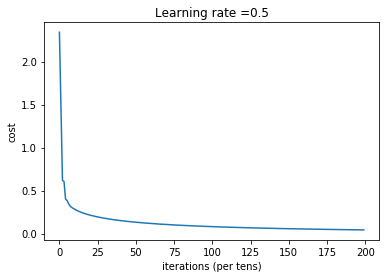

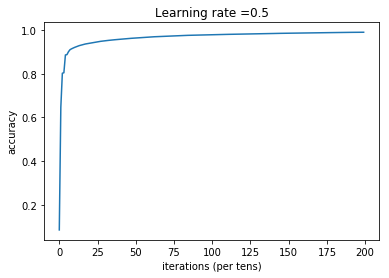

Final cost: 0.043017148951029205
Total Accuracy : 0.9893833333333335


In [15]:
#hyper_parameters
learning_rate = 0.5    
iterations=2000
layers_dims = [784, 150, 10]  #only change the middle value(s) to change the size of hidden layers, like [784, 320, 80, 40, 10]
L=len(layers_dims)
m=X_train.shape[1]

#dictionaries to store the parameters
W={}
b={}
A={}
Z={}
dZ={}
dW={}
db={}
dA={}

#initialize weights and biases
W,b=initialize_parameters_deep(layers_dims)

#L -1 is done as to get number of relu layer
L = L -1                 
#print(L)
X = X_train
Y = Y_train

costs=[]
accuracies=[]

for j in range(iterations):
    A[0]=X
    
    #calculating parameters for relu activation 
    for i in range(1,L):
        #print(W[1])
        Z[i] = np.matmul(W[i],A[i-1]) + b[i]
        A[i] = relu(Z[i])
        #print(i)
    
    #calculating parameters for softmax activation 
    Z[L] = np.matmul(W[L],A[L-1]) + b[L]
    A[L] = np.exp(Z[L]) / np.sum(np.exp(Z[L]), axis=0)
    #print('A',L,A[L].shape)
    
    #calculating cost
    cost = compute_multiclass_loss(Y, A[L])
    
    #calculating derivatives for softmax layer
    dZ[L] = A[L]-Y
    dW[L] = (1./m) * np.matmul(dZ[L], A[L-1].T)
    dA[L] = (-1./m) * np.sum(np.divide(Y,A[L]))
    db[L] = (1./m) * np.sum(dZ[L], axis=1, keepdims=True)
    #print(dW)
    #print(L,dZ[L])
    
    #calculating derivatives for relu layer
    for i in reversed(range(1,L)):
        #print(i)
        #print(dW)
        dA[i] = np.matmul(W[i+1].T, dZ[i+1])
        dZ[i] = dA[i] *relu_backward(Z[i])
        dW[i] = (1./m) * np.matmul(dZ[i], A[i-1].T)
        db[i] = (1./m) * np.sum(dZ[i], axis=1, keepdims=True)
        
        #print(i,dA.keys(),dZ.keys(),dW.keys(),db.keys())
        #print()
    
    #updating weights and biases
    for i in range(1,L+1):
        #print('a',i)
        #print(W[1])
        W[i] = W[i] - learning_rate * dW[i]
        b[i] = b[i] - learning_rate * db[i]
    

    if (j % 10 == 0):   #print cost,accuracy every 10th iteration
        
        predictions = np.argmax(A[L], axis=0)
        labels = np.argmax(Y_train, axis=0)
        
        acc = np.sum((predictions == labels)/m)
        print("Iteration", j, "cost: ", cost,'\t Accuracy :',acc)
        costs.append(cost)
        accuracies.append(acc)
        
        
# plot the cost and accuracy
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

plt.plot(np.squeeze(accuracies))
plt.ylabel('accuracy')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

print("Final cost:", cost)
print('Total Accuracy :',np.sum((predictions == labels)/m))






In [16]:
##Repeting the last iteration to see the final cost and accuracy
#using the latest(best) Ws, bs values

layers_dims = [784, 150, 10]
L=len(layers_dims)-1
m=X_train.shape[1]
A[0]=X_train

for i in range (1,L):
    Z[i] = np.matmul(W[i], A[i-1]) + b[i]
    A[i] = relu(Z[i])
    
Z[L] = np.matmul(W[L], A[L-1]) + b[L]
A[L] = np.exp(Z[L]) / np.sum(np.exp(Z[L]), axis=0)

predictions = np.argmax(A[L], axis=0)
labels = np.argmax(Y_train, axis=0)
#print(predictions,labels)

#analysis report
print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))
print("Final cost:", cost)
print('Total Accuracy :',np.sum((predictions == labels)/m))


[[5894    1    7    5    2    5   11    2    9   10]
 [   1 6693    7    5    6    4    5   17   17    9]
 [   2   15 5902   22    3    3    1   14    7    0]
 [   1    3    8 6035    1   16    0    4   13   11]
 [   1    7    7    1 5784    2   10   10    2   20]
 [   1    0    2   20    1 5355    5    1   12   10]
 [   9    2    2    0    8   11 5878    1   11    2]
 [   2   10   13   18    5    3    0 6197    1   21]
 [   6   10    8   12    3   12    8    3 5770    9]
 [   6    1    2   13   29   10    0   16    9 5857]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5946
           1       0.99      0.99      0.99      6764
           2       0.99      0.99      0.99      5969
           3       0.98      0.99      0.99      6092
           4       0.99      0.99      0.99      5844
           5       0.99      0.99      0.99      5407
           6       0.99      0.99      0.99      5924
           7       0.99      0.99   

In [17]:
#loading test data
testing_data_obj = pd.read_csv('mnist_test.csv',header=None)
testdata = np.array(testing_data_obj)

#test data input features
X_test=testdata[:,1:].T
#print(X_test,X_test.shape)
X_test=X_test/255

#test data output values
Y_test = testdata[:,0]
Y_test = Y_test.reshape(1,Y_test.shape[0])
#print(Y_test,Y_test[0,0],Y_test.shape,testdata.shape)

#one-hot encoding output values
m=Y_test.shape[1]
Y_prob=np.zeros((10,m))
for i in range(0,m):
    a=Y_test[0,i]
   # print(a)
    Y_prob[a,i] = 1
    #print(i)
ans_test_real=Y_test
#print(Y_prob,Y_prob.shape)    
Y_test=Y_prob

In [18]:
#using the latest(best) Ws, bs value to calculate the output of the test cases

layers_dims = [784, 150, 10]
L=len(layers_dims)-1
m=X_test.shape[1]
A[0]=X_test

for i in range (1,L):
    Z[i] = np.matmul(W[i], A[i-1]) + b[i]
    A[i] = relu(Z[i])
    
Z[L] = np.matmul(W[L], A[L-1]) + b[L]
A[L] = np.exp(Z[L]) / np.sum(np.exp(Z[L]), axis=0)

cost = compute_multiclass_loss(Y_test, A[L])

predictions = np.argmax(A[L], axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))
print("Final cost:", cost)
print('Total Accuracy :',np.sum((predictions == labels)/m))

[[ 969    0    5    0    2    3    4    1    3    3]
 [   0 1122    2    0    0    1    3    7    0    6]
 [   0    3  998    3    5    0    2    5    4    1]
 [   2    1    4  993    1    8    1    4    6    6]
 [   1    0    4    0  959    1    3    1    3    8]
 [   2    0    0    4    1  864    3    0    4    2]
 [   1    3    5    0    1    5  940    0    4    0]
 [   2    2    6    3    3    1    1 1001    4    6]
 [   2    4    8    4    1    5    1    2  944    3]
 [   1    0    0    3    9    4    0    7    2  974]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       990
           1       0.99      0.98      0.99      1141
           2       0.97      0.98      0.97      1021
           3       0.98      0.97      0.98      1026
           4       0.98      0.98      0.98       980
           5       0.97      0.98      0.98       880
           6       0.98      0.98      0.98       959
           7       0.97      0.97   

In [ ]:
# Use the next command to create the files containing the weights and bias to be used for the next time
#it can also be used to load parameters in another file

In [ ]:
np.save('W_weights.npy',W)
np.save('b_bias.npy',b)